In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

In [2]:
#make function
def Fungsi1(X,Y):
    z=(1+(X+Y+1)**2 * (19 - 14 * X + (3 * X**2) - 14 * Y + 6 * X * Y + (3 * Y**2))) * (30 + (2 * X - 3 * Y)**2 * (18 - 32 * X + 12 * X**2 + 48 * Y - 36 * X * Y + 27 * Y**2))
    return z

In [3]:
# Make data.
X = np.arange(-2, 2, 0.01)#generate angka dari -3 sampai 3, interval 0.01 (array)
Y = np.arange(-2, 2, 0.01)
X, Y = np.meshgrid(X, Y)#x,y dipasangkan dng koordinat di mesh
Z= Fungsi1(X,Y)

In [36]:
num_func_params = 2 #x & y
num_swarm = 100 #100 titik swarm
position = -3 + 6 * np.random.rand(num_swarm, num_func_params) #random posisi swarm, masuk array posisi
velocity = np.zeros([num_swarm, num_func_params]) #kecepatan
personal_best_position = np.copy(position) 
personal_best_value = np.zeros(num_swarm)

In [37]:
for i in range(num_swarm):
    personal_best_value[i]=Fungsi1(position[i][0],position[i][1])

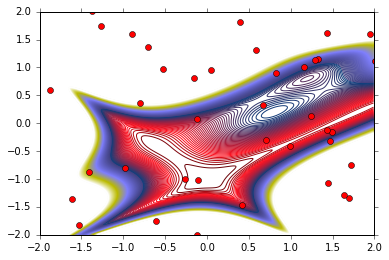

In [38]:
levels = np.linspace(-100, 5000, 200) #generate nilai2 linear dari -1 s.d. 35 sebanyak 100 buah garis
CS = plt.contour(X, Y, Z, levels =levels, cmap=cm.gist_stern)
plt.gca().set_xlim([-2,2])
plt.gca().set_ylim([-2,2])

for i in range(num_swarm):
    plt.plot(position[i][0], position[i][1], 'ro')

In [7]:
t=1
global_best = np.min(personal_best_value)
global_best_position = np.copy(personal_best_position[np.argmin(personal_best_value)])

In [8]:
for i in range(num_swarm):
    #Z = (1-X)**2 + 1 *(Y-X**2)**2
    error = Fungsi1(position[i][0],position[i][1])
    if personal_best_value[i] > error:
        personal_best_value[i] = error
        personal_best_position[i] = position[i]

In [9]:
best = np.min(personal_best_value)
best_index = np.argmin(personal_best_value)
if global_best > best:
    global_best = best
    global_best_position = np.copy(personal_best_position[best_index])

In [10]:
c1 = 0.1 #konstanta dr rumus
c2 = 0.2
for i in range(num_swarm):
    #update velocity
    velocity[i] += c1 * np.random.rand() * (personal_best_position[i]-position[i]) \
                +  c2 * np.random.rand() * (global_best_position - position[i])
    position[i] += velocity[i]

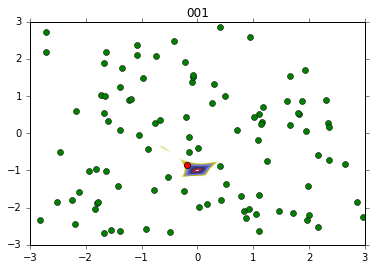

In [11]:
levels = np.linspace(-1, 35, 100)
CS = plt.contour(X, Y, Z, levels =levels, cmap=cm.gist_stern)#cmap=color map; format: cm.nama
plt.gca().set_xlim([-3,3])
plt.gca().set_ylim([-3,3])

for i in range(num_swarm):
    plt.plot(position[i][0], position[i][1], 'go')#g=green, o: titik
plt.plot(global_best_position[0], global_best_position[1], 'ro')#r=red
plt.title('{0:03d}'.format(t))#format nama file 0nya 3x

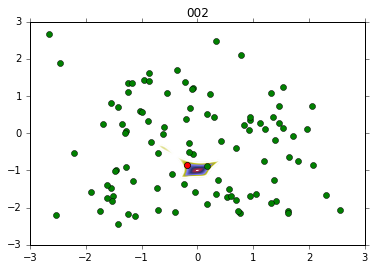

In [12]:
t=2
for i in range(num_swarm):
    error = Fungsi1(position[i][0],position[i][1])
    if personal_best_value[i] < error:
        personal_best_value[i] = error
        personal_best_position[i] = position[i]
best = np.min(personal_best_value)
best_index = np.argmin(personal_best_value)
if global_best > best:
    global_best = best
    global_best_position = np.copy(personal_best_position[best_index])
    
for i in range(num_swarm):
    #update velocity
    velocity[i] += c1 * np.random.rand() * (personal_best_position[i]-position[i]) \
                +  c2 * np.random.rand() * (global_best_position - position[i])
    position[i] += velocity[i]
    
fig = plt.figure()
CS = plt.contour(X, Y, Z, levels =levels, cmap=cm.gist_stern)
plt.gca().set_xlim([-3,3])
plt.gca().set_ylim([-3,3])
for i in range(num_swarm):
    plt.plot(position[i][0], position[i][1], 'go')
plt.plot(global_best_position[0], global_best_position[1], 'ro')
    
plt.title('{0:03d}'.format(t))